In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [5]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-08 17:48:31--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.249
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [text/plain]
Сохранение в: «adult.data.3»

adult.data.3        100%[===================>]   3,79M   182KB/s    за 12s     

2019-04-08 17:48:44 (324 KB/s) - «adult.data.3» сохранён [3974305/3974305]



In [6]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [7]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [8]:
df = pd.read_csv("./adult.data", names=cols, sep=', ')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [10]:
print(df.groupby(["sex"])["sex"].count())

sex
Female    10771
Male      21790
Name: sex, dtype: int64


# Средний возраст мужчин и женщин?

In [11]:
df.groupby(["sex"]).age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [12]:
((df['native-country'] == "United-States").sum()) / df["native-country"].count()

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

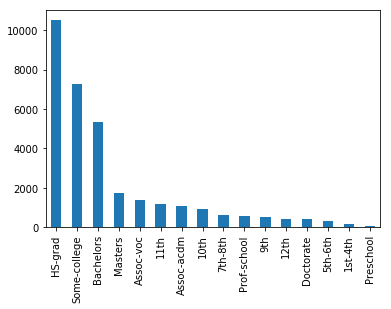

In [14]:
# Вариант 1
df_edu_1 = df["education"].value_counts()
#plt.bar(x='education', height=df_edu.values, rot="vertical", tick_label="Распределение образования людей")
df_edu_1.plot.bar()

Text(0, 0.5, 'Number')

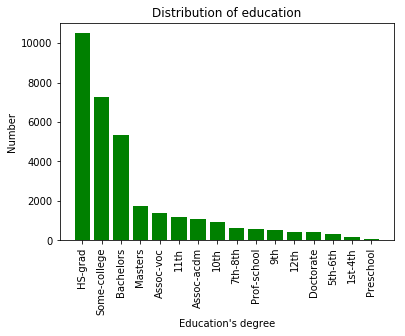

In [15]:
# Вариант 2
df_edu_2 = df["education"].value_counts()
plt.bar(df_edu_2.index, df_edu_2.values, tick_label=df_edu_2.index, color="g")
plt.xticks(rotation='vertical')
plt.title("Distribution of education")
plt.xlabel("Education's degree")
plt.ylabel("Number")

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [16]:
str_avg = "Average values of divorced people"
str_std = "Standard deviation"
_avg = (df[df['marital-status']=='Divorced']).fnlwgt.mean()
_std = (df[df['marital-status']=='Divorced']).fnlwgt.std()
avg_std = {str_avg: [_avg], str_std: [_std]}
print(avg_std)
df_avg_std = pd.DataFrame(data=avg_std, index=["Number of people"])
df_avg_std

{'Average values of divorced people': [185802.79045689848], 'Standard deviation': [105646.78945933598]}


,Average values of divorced people,Standard deviation
Number of people,185802.790457,105646.789459


Оно мне напоминает функцию вероятности при распределении Пуассона (2 <= лямбда <= 7)


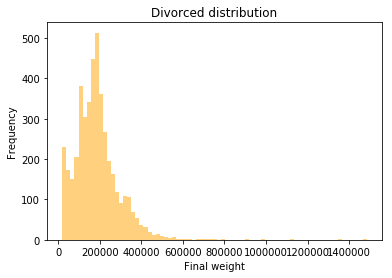

In [17]:
bins = plt.hist((df[df['marital-status']=='Divorced']).fnlwgt, color='orange', alpha=0.5, label='female', bins=75)
plt.xlabel("Final weight")
plt.ylabel("Frequency")
plt.title('Divorced distribution')
print("Оно мне напоминает функцию вероятности при распределении Пуассона (2 <= лямбда <= 7)")

> Ответ: оно мне напоминает пуассоновское распределение (https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0#/media/File:Poisson_distribution_PMF.png)

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [88]:
people_with_he = 0
temp_df = df.loc[df["result"] == ">50K", "education"].value_counts()
common_sz = temp_df.sum()
people_with_he = temp_df["Bachelors"] + temp_df["Masters"] + temp_df["Doctorate"]
result = people_with_he / common_sz
print(temp_df)
print(f"Common number of people with salary more than 50k: {common_sz}")
print(f"Number of people with salary more than 50k with higher education(BSc, MSc, PhD): {people_with_he}")
print(f"Result: {result} < 1")

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64
Common number of people with salary more than 50k: 7841
Number of people with salary more than 50k with higher education(BSc, MSc, PhD): 3486
Result: 0.4445861497258003 < 1


> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [100]:
_avg_work_df = df.groupby('education')['hours-per-week'].mean()
_avg_work_df.sort_values(ascending=False)

education
Prof-school     47.425347
Doctorate       46.973366
Masters         43.836332
Bachelors       42.614006
Assoc-voc       41.610709
HS-grad         40.575374
Assoc-acdm      40.504217
7th-8th         39.366873
5th-6th         38.897898
Some-college    38.852284
1st-4th         38.255952
9th             38.044747
10th            37.052519
Preschool       36.647059
12th            35.780600
11th            33.925957
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64
Males work more than Females


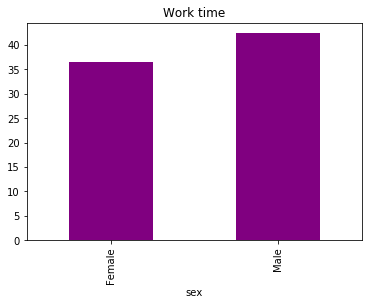

In [119]:
sex_work_df = df.groupby("sex")["hours-per-week"].mean()
sex_work_df.plot.bar(color="purple", title="Work time")
print(sex_work_df)
print(f"Males work more than Females")

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [152]:
not_related = df.relationship.isin(['Not-in-family', 'Unmarried'])
print('Not in relations:', df[not_related]['hours-per-week'].mean())
print('In relations:', df[~not_related]['hours-per-week'].mean())

Not in relations: 40.157944004765554
In relations: 40.595290725612685


# Из каких стран люди работают farmers/fishers?

In [134]:
countries_list = list(df[df['occupation'] == 'Farming-fishing']['native-country'].unique())
print(f"Farmers/fishers countries: {countries_list}")

Farmers/fishers countries: ['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico', 'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam', 'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal', 'El-Salvador', 'Hong', 'Ireland', 'France']


# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [137]:
max_hours = df['hours-per-week'].max()
print(f"Max hours time per week: {max_hours} hours")

Max hours time per week: 99 hours


In [150]:
stachanovtsi = len(df[df['hours-per-week'] == df['hours-per-week'].max()])
print("People who works for time equals {} hours: {} people".format(df['hours-per-week'].max(), stachanovtsi))

People who works for time equals 99 hours: 85 people
